<a href="https://colab.research.google.com/github/groneperrosato/academic/blob/main/PedroSergey_CNN_semana1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color="#113D68" size=6>Actividad Semana 1</font></h1>
<h2><font color="#113D68" size=6>Análisis problema de clasificación con Deep Learning</font></h2>


<br><br>
<div style="text-align: right">
<font size=3>Pedro Sergey Toledo Bordón</font><br>
<font size=3>Semana 1: Redes convolucionales y otros tipos de redes</font><br>
<font size=3>IEBS</font>
</div>

---


In [1]:
import tensorflow as tf
import numpy as np

# Para mostrar gráficas

import matplotlib.pyplot as plt
%matplotlib inline

En esta actividad vamos a seguir familiarizándonos con la herramienta *TensorFlow* pero esta vez para redes convolucionales, para ello seguiremos utilizando el dataset de imágenes a color visto en clase.

<a id="section2"></a>
# <font color="#004D7F" size=5>CIFAR10 dataset</font>

Este dataset es el que hemos visto en la clase anterior y con el que trabajaremos en el caso práctico. Para refresarlo, es un dataset que contiene imágenes en color de objetos que tenemos que clasificar.

El dataset de de imágenes CIFAR10 tiene las siguintes características:
- Imágenes de 10 tipos de objetos: aviones, automóbiles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones.
- Imágenes en color, es decir, cada pixel tiene 3 valores entre 0 y 255, esos valores corresponden a los valores de RGB (Red, Green, Blue).
- Imágenes de tamaño 32x32x3, 32x32 píxeles y 3 valores por pixel.
- 50.000 imágenes para el entrenamiento y 10.000 imágenes para el test.

<br><br>
<img src="https://drive.google.com/uc?id=1vVu275LEOyQCbw9x1f8ygfAhxS3PK_Zl" align="center" width="400">

## <font color="#004D7F" size=4>Ejercicio 1</font>
Para empezar debemos descargar los datos de las bases de datos de Tensorflow.

Carga los datos como hemos visto en clase:

In [2]:
# importamos los datos

cifar = tf.keras.datasets.cifar10

# cargamos los datos

(x_train, y_train), (x_test, y_test) = cifar.load_data()

Normaliza los datos:

In [3]:
# normalizamos los datos

x_train, x_test = x_train / 255, x_test /255

Familiarízate con el dataset accediendo a los elementos, viendo los tamaños, los valores, etc.

In [4]:
# creamos un diccionario con los valores de las etiquetas

label_dict = {
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
    }

In [5]:
# exploramos un poco los datos

print(f"Los datos de entrenamiento tienen {x_train.shape[0]} observaciones con la estructura {x_train.shape[1:]}.")
print(f"Los datos de test tienen {x_test.shape[0]} observaciones con la estructura {x_test.shape[1:]}.")
print(f"Un ejemplo de una etiqueta puede ser: {y_train[0][0]}")

print("\nLas etiquetas son:\n")

for i in range(len(label_dict)):
  print(f"{i}: {label_dict[i]}")



Los datos de entrenamiento tienen 50000 observaciones con la estructura (32, 32, 3).
Los datos de test tienen 10000 observaciones con la estructura (32, 32, 3).
Un ejemplo de una etiqueta puede ser: 6

Las etiquetas son:

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck


In [6]:
# vemos un ejemplo de una observación

x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

Podemos ver como los datos tienen la forma de 32x32 pixeles, con 3 valores para cada uno de los pixeles, correspondientes a los colores RGB.

In [7]:
# función que nos permite ver un ejemplo de las imágenes

def show_im(images):

  fig = plt.figure(figsize = (8,8))
  index = np.random.randint(low = 0, 
                            high = len(images),
                            size = 64)
  
  for i in range(64):
    fig.add_subplot(8, 8, i + 1)
    plt.axis("off")
    plt.imshow(images[index[i]])  

  plt.show()

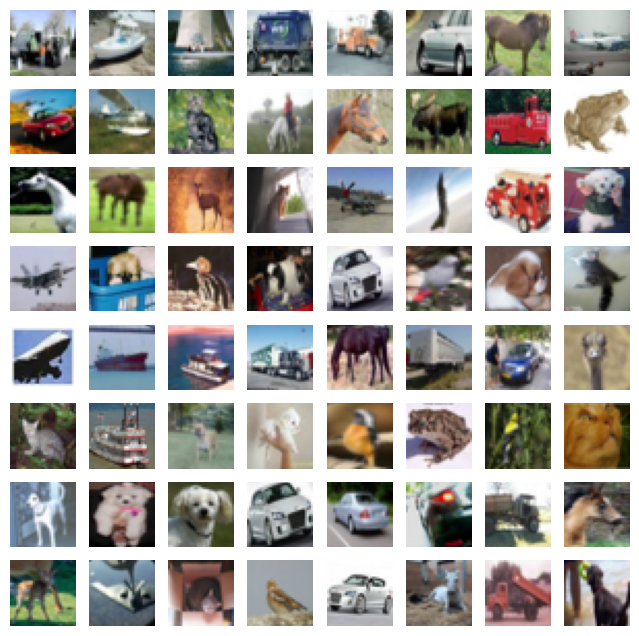

In [8]:
# vemos un ejemplo de imágenes

show_im(x_train)

<a id="section4"></a>
# <font color="#004D7F" size=5>Experimentos con CNNs</font>
A continuación, realiza 2 experimentos usando redes convolucionales con las redes que se te indican en cada sección.

<a id="section4.1"></a>
# <font color="#004D7F" size=4>Ejercicio 2</font>

Arquitectura de la red:

- Capa convolucional `Conv2D` con 16 filtros/kernels de tamaño `(3,3)`, padding con relleno, activación *ReLU* y con entrada `(32,32,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.0001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 10

In [9]:
# creamos el modelo

model1 = tf.keras.Sequential(
    name = "Primera_arquitectura"
)

# vamos añadiendo las capas con los requerimientos necesarios

model1.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model1.add(tf.keras.layers.MaxPooling2D(padding="same", strides=(2, 2), pool_size = (2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(units=64, activation="relu"))
model1.add(tf.keras.layers.Dense(units=32, activation="relu"))
model1.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [10]:
# vemos un resumen de lo que tenemos hasta ahora

model1.summary()

Model: "Primera_arquitectura"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)                262208    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                              

In [17]:
# compilamos el modelo

opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

model1.compile(
    optimizer = opt,
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

# entrenamos el modelo

hist_model1 = model1.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_test, y_test),
    epochs = 10    
)

Epoch 1/10
1563/1563 [==============================] - 20s 5ms/step - loss: 1.8389 - accuracy: 0.3513 - val_loss: 1.6241 - val_accuracy: 0.4329
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5572 - accuracy: 0.4531 - val_loss: 1.4934 - val_accuracy: 0.4648
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4406 - accuracy: 0.4916 - val_loss: 1.3946 - val_accuracy: 0.5064
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3637 - accuracy: 0.5167 - val_loss: 1.3409 - val_accuracy: 0.5295
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3074 - accuracy: 0.5380 - val_loss: 1.3213 - val_accuracy: 0.5280
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2666 - accuracy: 0.5513 - val_loss: 1.2984 - val_accuracy: 0.5374
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2314 - accuracy: 0.5673 - val_loss: 1.2496 - val_accurac

Evalua el modelo con el conjunto de test y muestra en una gráfica la evolución del entrenamiento:

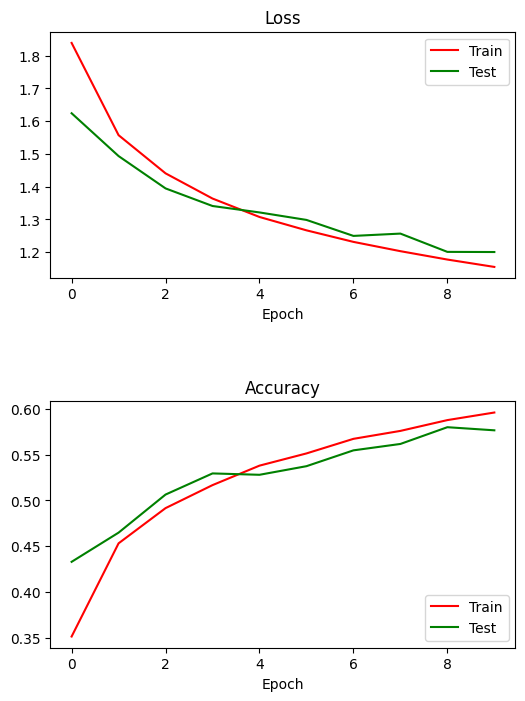

In [20]:
# vemos la evolución del entrenamiento

fig = plt.figure(figsize = (6,8))

fig.add_subplot(2,1,1)
plt.plot(hist_model1.history["loss"], color = "red", label = "Train")
plt.plot(hist_model1.history["val_loss"], color = "green", label = "Test")
plt.legend(loc = "upper right")
plt.xlabel("Epoch")
plt.title("Loss")

fig.add_subplot(2,1,2)
plt.plot(hist_model1.history["accuracy"], color = "red", label = "Train")
plt.plot(hist_model1.history["val_accuracy"], color = "green", label = "Test")
plt.legend(loc = "lower right")
plt.xlabel("Epoch")
plt.title("Accuracy")

plt.subplots_adjust(wspace = 0.5,
                    hspace = 0.5)

plt.show()

Escribe un pequeño texto sacando conclusiones de los resultado obtenidos:

Como bien podemos observar en las gráficas de la parte superior, los resultados no han sido tan buenos como en el caso de MNIST. La función de pérdida ha bajado hasta 1.2, mientras que el accuracy solo ha llegado hasta 0.6. Aún así, no se ha caído en sobreajuste, aspecto positivo a tener en cuenta.

<a id="section4.2"></a>
# <font color="#004D7F" size=4>Ejercicio 3</font>

Arquitectura de la red:

- Capa convolucional `Conv2D` con 32 filtros/kernels de tamaño `(3,3)`, padding con relleno, activación *ReLU* y con entrada `(32,32,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 64 filtros/kernels de tamaño `(3,3)`, padding con relleno y activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 64 filtros/kernels de tamaño `(3,3)`, padding con relleno y activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 20

In [18]:
# hacemos lo mismo que en el caso anterior

model2 = tf.keras.Sequential(
    name = "Primera_arquitectura"
)

# vamos añadiendo las capas con los requerimientos necesarios

model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model2.add(tf.keras.layers.MaxPooling2D(padding="same", strides=(2, 2), pool_size = (2,2)))

model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(tf.keras.layers.MaxPooling2D(padding="same", strides=(2, 2), pool_size = (2,2)))

model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(tf.keras.layers.MaxPooling2D(padding="same", strides=(2, 2), pool_size = (2,2)))

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=64, activation="relu"))
model2.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [19]:
# compilamos el modelo

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

model2.compile(
    optimizer = opt,
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

# entrenamos el modelo

hist_model2 = model2.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_test, y_test),
    epochs = 20    
)

Epoch 1/20
1563/1563 [==============================] - 11s 5ms/step - loss: 1.4682 - accuracy: 0.4692 - val_loss: 1.1914 - val_accuracy: 0.5687
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0685 - accuracy: 0.6254 - val_loss: 1.0159 - val_accuracy: 0.6420
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9175 - accuracy: 0.6788 - val_loss: 0.9232 - val_accuracy: 0.6816
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8258 - accuracy: 0.7113 - val_loss: 0.8753 - val_accuracy: 0.7004
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7556 - accuracy: 0.7360 - val_loss: 0.8375 - val_accuracy: 0.7121
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6987 - accuracy: 0.7565 - val_loss: 0.8271 - val_accuracy: 0.7205
Epoch 7/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6500 - accuracy: 0.7721 - val_loss: 0.8294 - val_accuracy

Evalua el modelo con el conjunto de test y muestra en una gráfica la evolución del entrenamiento:

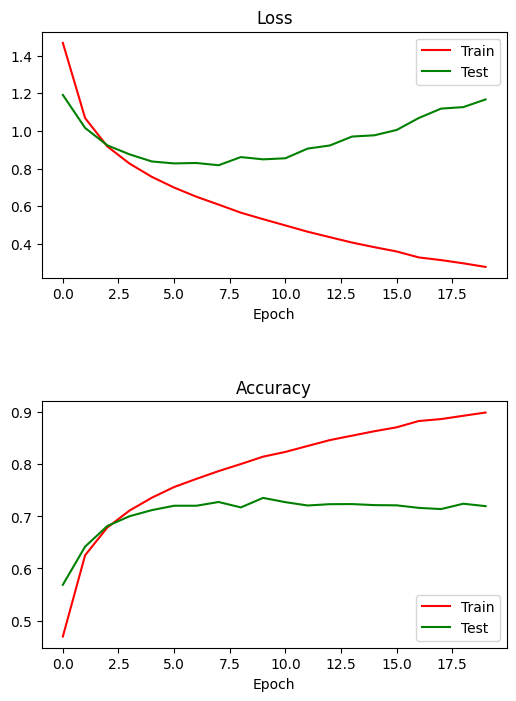

In [21]:
# vemos la evolución del entrenamiento

fig = plt.figure(figsize = (6,8))

fig.add_subplot(2,1,1)
plt.plot(hist_model2.history["loss"], color = "red", label = "Train")
plt.plot(hist_model2.history["val_loss"], color = "green", label = "Test")
plt.legend(loc = "upper right")
plt.xlabel("Epoch")
plt.title("Loss")

fig.add_subplot(2,1,2)
plt.plot(hist_model2.history["accuracy"], color = "red", label = "Train")
plt.plot(hist_model2.history["val_accuracy"], color = "green", label = "Test")
plt.legend(loc = "lower right")
plt.xlabel("Epoch")
plt.title("Accuracy")

plt.subplots_adjust(wspace = 0.5,
                    hspace = 0.5)

plt.show()

Escribe un pequeño texto sacando conclusiones de los resultado obtenidos:

En este caso, se han conseguido mejores resultados, tanto en la función de pérdida, como en la métrica de validación.

Pero también hemos caido en sobre ajuste, tal y como se puede observar en ambas gráficas, donde las líneas se van separando cada vez más.

Esto no es del todo recomendable, ya que nuestra red lo que esta haciendo es "memorizando" las imágenes y tendrá problemas a la hora de clasificar datos que no ha visto con anterioridad.

# <font color="#004D7F" size=3>Ejercicio 4</font>
Una vez realizado todos los experimentos anteriores, ¿qué modelo elegirías para desplegar en producción? ¿Por qué? 

Explica en breves palabras qué modelo eligirías para desplegar en producción y porqué. Compara cada experimento y extráe tus propias conclusiones.

Si tuviera que elegir sí o sí entre uno de estos dos modelos, me quedaría con el primero.

Aún sabiendo que tengo un 60% de posiblidad de acertar en la clasificación de la foto en cuestión, se que no tendré muchos problemas a la hora de clasificar fotos que no haya visto con anterioridad.

Sin embargo, si elegimos el modelo 2, debido al sobreajuste, puede ser que los valores de las métricas tan buenos para el conjunto de entrenamiento, no sean tan buenos a la hora de poner el modelo a funcionar con nuevos elementos.


Aún así, si no fuera estrictamente necesario quedarme con ninguno de los dos, indagaría un poco más y buscaría algún modelo que fuese un poco mejor que el primero, pero que no entrara cayera en sobreajuste como el segundo.


Muchas gracias por esta clase, ha sido muy entretenida y didáctica!

Seguimos progresando!